#  Predicting Liver Cirrhosis Stage


# Phase 2 Predictive modeling

# Table of Contents

* [Introduction](#Introduction)

    + [Phase 1 Summary](#Phase-1-Summary)
    + [Report Overview](#Report-Overview)
    + [Overview of Methodology](#Overview-of-Methodology)
* [Data Preprocessing](#Data-Preprocessing)
    
* [Predictive Modelling](#Predictive-Modelling)
    + [Feature Selection (FS)](#Feature-Selection-(FS))
    + [Model Fitting & Tuning](#Model-Fitting-&-Tuning)
        + [Neural Network Model Fitting & Tuning](#Neural-Network-Model-Fitting-&-Tuning)
    + [Model Comparison](#Model-Comparison)
    
* [Critique & Limitations](#Critique-&-Limitations)
* [Summary & Conclusions](#Summary-&-Conclusions)
    + [Project Summary](#Project-Summary)
    + [Summary of Findings](#Summary-of-Findings)
    + [Conclusions](#Conclusions)
* [References](#References) 


# Introduction

### Phase 1 Summary

In Phase 1, we have chosen  the cirrhosis prediction Dataset that is taken from kaggle. Cirrhosis is a condition in which the liver becomes infected due to various liver diseases and conditions, including hepatitis and chronic alcoholism. The information in the dataset is collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) and the study was conducted in between 1974 and 1984.

In Phase 1, the first step is related to cleaning the data because cleaning the data is an essential part. While doing data cleaning we checked the missing values and replaced them with mean and median. And changing the format of data in some column like in age column the data is in days so we convert it into years.

Furthermore, to gain some insights from data, we use different types of visualisation like bar plots, pie charts and other graphs. This visualization technique helps us to understand the distribution between variables, identifying patterns and to understand the relationship between different features. 

Moreover, We did a brief literature review in phase 1. In this literature review we studied various research papers, articles and literature that is related to the cirrhosis disease. The purpose of this literature is to understand the problem and find some information that will help for data modelling 

In conclusion, we can say that phase 1 of the project involved the various tasks related to cleaning the data, visualising the data and a brief literature review. These task is essential for further tasks like data modelling and predicting the stage of cirrhosis disease. 

Now we are doing further analysis on this dataset to fit 4 different models and make predictions about the stage of cirrhosis liver disease.


### Report Overview

The main objective of this project is to do predictive modelling and find the stage of cirrhosis liver disease by using different types of models like KNN, Decision tree, Random Forest and naive bayes algorithm. 

In this report, we will do one-hot-encoding on categorical variables and do preprocessing on some columns so that is good for model prediction. After that we will do feature selection using different techniques and understand which features are most important and choose the top 15 features. This step helps to understand which feature is most important for more accuracy. 

Moreover, in the next part of the report we will perform the hyperparameter tuning and fit the model using cross validation method and other methods. After that we will perform a proper research on Neural Network Model Fitting & Tuning. This article contains a proper explanation about Neural Network Model Fitting and Tuning. 

Furthermore, After fitting the model and finding the accuracy score of different models, we will compare the models and discuss the Critique & Limitations of the models. 

In conclusion, the aim of this machine learning model is to do predictive analysis on cirrhosis liver disease and compare the accuracy of different models.


### Overview of Methodology


The methodology working in this project contains a series of well planned steps to achieve the objective of predicting the stage of cirrhosis liver disease and compare the different models' performance. The main sections of the methodology include data preprocessing, feature selection, model fitting and evaluation, hyperparameter tuning, and model comparison.

The first step of this report is data preprocessing, where we do one-hot-encoding to handle categorical variables and after that we will do scaling using maxima - minima because different columns have different scales. This step is very important to gain good performance in a predictive model.

Next, we will do feature selection. In which we will use some method to find the importance of different features and include only the most important features that have a good impact on  predicting the stage of cirrhosis liver disease. So using this feature selection, we will drop some features that are not as important for our predictive modelling. 

Moreover, After preprocessing and feature selection, we work on different algorithms, including `KNN`, `decision tree`, `random forest` and `naive Bayes`, to build predictive models. For that we will split the dataset into training data and test data. And also split the data from the target variable.  For each model we will apply cross validation techniques and use GridSearchCV to do hyper parameter tuning and find the best parameter for high accuracy. This process is helpful for finding the combination of hyperparameters that help to maximise the performance of a predictive model. 

We will also try to explore the Neural Network Model Fitting & Tuning using different sources and articles. We also discuss the model fitting and hyperparameter tuning of neural networks

After doing model evaluation, we will compare the models by using performance metrics and paired t-tests. And discuss the strength and weakness of the model. 


**Dataset Retrieval**

* Loading the `modules` that we need during the project.
* We save the `cleaned dataset` from the Phase 1 as a csv and now we will load that dataset by using pandas 

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split         
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [3]:
data = pd.read_csv("Phase2_Group_98.csv") 

In [4]:
data.sample(10, random_state=999)  

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
317,1680,C,D-penicillamine,43.0,F,N,Y,N,N,0.7,309.5,3.68,73.0,1259.0,114.70,108.0,306.0,9.5,2.0
344,3021,CL,D-penicillamine,48.0,F,N,Y,N,N,0.5,309.5,3.76,73.0,1259.0,114.70,108.0,388.0,10.1,2.0
221,597,D,Placebo,46.0,F,N,Y,N,N,4.5,372.0,3.38,227.0,2310.0,167.40,135.0,240.0,12.4,3.0
287,1067,CL,Placebo,49.0,F,N,Y,N,S,8.7,310.0,3.89,107.0,637.0,117.00,242.0,298.0,9.6,2.0
219,1235,D,D-penicillamine,64.0,F,N,N,Y,N,3.8,426.0,3.22,96.0,2716.0,210.80,113.0,228.0,10.6,2.0
159,2772,C,Placebo,57.0,F,N,N,N,N,0.6,217.0,3.62,13.0,414.0,75.95,119.0,224.0,10.5,3.0
100,3581,C,Placebo,45.0,F,N,N,N,N,0.9,400.0,3.60,31.0,1689.0,164.30,166.0,327.0,10.4,3.0
245,1435,CL,D-penicillamine,33.0,F,N,Y,N,N,2.1,387.0,3.77,63.0,1613.0,150.35,33.0,185.0,10.1,4.0
164,1077,D,D-penicillamine,53.0,M,N,Y,N,N,4.0,196.0,3.45,80.0,2496.0,133.30,142.0,212.0,11.3,4.0
86,198,D,D-penicillamine,37.0,F,N,N,N,N,1.1,345.0,4.40,75.0,1860.0,218.55,72.0,447.0,10.7,3.0


In [5]:
data.shape

(418, 19)

In [6]:
mask_df = data.copy()

## Data Preprocessing

The `Edema` column has imbalance category  that has a issue in our dataset to balance the data in this column we will combine two categories `edema present` and `edema present without diuretic`  

In [7]:
#using value_count to see the unique value in the Edema column
mask_df["Edema"].value_counts()

N    354
S     44
Y     20
Name: Edema, dtype: int64

In [8]:
# replacing the S and Y with Yes 
mask_df['Edema'] = mask_df['Edema'].replace(['S', 'Y'], 'Yes') 

In [9]:
mask_df["Edema"].value_counts()

N      354
Yes     64
Name: Edema, dtype: int64

In [10]:
mask_df["Stage"].value_counts()

3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

`Target` column has a serious `imbalance` in stage of  cirrhosis liver disease so to overcome from this situation we are combining the stage 1 into stage 2 so now we have only three stages 2,3,4

In [11]:
mask_df["Stage"] = mask_df["Stage"].replace({1.0:2.0})

`Droping` the target column and creating a new dataframe for prediction 

In [12]:
#droping the Stage column 
mask_df1 = mask_df.drop("Stage", axis=1)
mask_df1.sample(4, random_state=999)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
317,1680,C,D-penicillamine,43.0,F,N,Y,N,N,0.7,309.5,3.68,73.0,1259.0,114.7,108.0,306.0,9.5
344,3021,CL,D-penicillamine,48.0,F,N,Y,N,N,0.5,309.5,3.76,73.0,1259.0,114.7,108.0,388.0,10.1
221,597,D,Placebo,46.0,F,N,Y,N,N,4.5,372.0,3.38,227.0,2310.0,167.4,135.0,240.0,12.4
287,1067,CL,Placebo,49.0,F,N,Y,N,Yes,8.7,310.0,3.89,107.0,637.0,117.0,242.0,298.0,9.6


Creating the array of stage column and storing it in target variable 

In [13]:
# creating the array of target variable
target = mask_df["Stage"].values

In [14]:
# checking the unique values in target array
np.unique(target, return_counts = True)

(array([2., 3., 4.]), array([113, 161, 144]))

In [15]:
# creating a list of categorical data for one hot encoding  
cat_col = mask_df1.columns[mask_df1.dtypes==object].tolist()
cat_col

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

**For our predictive model we are converting categorical data into binary data by using one-hot=encoding**

In [16]:
# using get_dummies function of pandas to do one-hot encoding 
for colum in cat_col:
    if (mask_df1[colum].nunique() == 2):
        mask_df1[colum] = pd.get_dummies(mask_df1[colum], drop_first=True)
mask_df1 = pd.get_dummies(mask_df1)

In [17]:
mask_df1.sample(4, random_state=999)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status_C,Status_CL,Status_D
317,1680,0,43.0,0,0,1,0,0,0.7,309.5,3.68,73.0,1259.0,114.7,108.0,306.0,9.5,1,0,0
344,3021,0,48.0,0,0,1,0,0,0.5,309.5,3.76,73.0,1259.0,114.7,108.0,388.0,10.1,0,1,0
221,597,1,46.0,0,0,1,0,0,4.5,372.0,3.38,227.0,2310.0,167.4,135.0,240.0,12.4,0,0,1
287,1067,1,49.0,0,0,1,0,1,8.7,310.0,3.89,107.0,637.0,117.0,242.0,298.0,9.6,0,1,0


**Scaling is a important part of predictive modeling because the scale of different column is different. And this is not good for predictive modeling**

In [18]:
from sklearn import preprocessing
mask_df1_columns = mask_df1.columns
mask_df1_columns

Index(['N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders',
       'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos',
       'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Status_C',
       'Status_CL', 'Status_D'],
      dtype='object')

In [19]:
df_scaler = preprocessing.MinMaxScaler()

In [20]:
df_scaler.fit(mask_df1)
mask_df1= df_scaler.fit_transform(mask_df1)

In [21]:
mask_df1 = pd.DataFrame(mask_df1, columns=mask_df1_columns)

In [22]:
mask_df1.sample(4,random_state=999) 

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status_C,Status_CL,Status_D
317,0.344762,0.0,0.326923,0.0,0.0,1.0,0.0,0.0,0.014440,0.114502,0.641791,0.118151,0.071463,0.205036,0.132743,0.370258,0.055556,1.0,0.0,0.0
344,0.626841,0.0,0.423077,0.0,0.0,1.0,0.0,0.0,0.007220,0.114502,0.671642,0.118151,0.071463,0.205036,0.132743,0.494689,0.122222,0.0,1.0,0.0
221,0.116954,1.0,0.384615,0.0,0.0,1.0,0.0,0.0,0.151625,0.152266,0.529851,0.381849,0.148894,0.327338,0.180531,0.270106,0.377778,0.0,0.0,1.0
287,0.215818,1.0,0.442308,0.0,0.0,1.0,0.0,1.0,0.303249,0.114804,0.720149,0.176370,0.025638,0.210374,0.369912,0.358118,0.066667,0.0,1.0,0.0


# Predictive Modelling

### Feature Selection (FS)

Feature Selection is a technique which is used to choose the most important feature from data. There are many types of feature selection like F-score, random forest etc. We are performing selectk best and random forest to find the importance of a column. Feature selection used to improve the performance of algorithms. So here we are using sklearn library to perform the feature selection 


### Feature selection by using F-Score

Here we are using the feature selection function of sklearn library and calculating the f score for features with respect to target column and taking the top 10 features that have high f-score. 

In [23]:
#using feature selection method and using SelectKBest function to get the indices of columns 
fs_by_f_score = fs.SelectKBest(fs.f_classif, k=10)
fs_by_f_score.fit_transform(mask_df1, target)
high_f_score_indices = np.argsort((fs_by_f_score.scores_))[::-1][0:10]
high_f_score_indices 

array([ 0,  5, 10, 17, 19, 16,  4,  7,  6, 15])

In [24]:
#getting the column names by using indices error
high_f_score_columns = mask_df1.columns[high_f_score_indices].values
high_f_score_columns

array(['N_Days', 'Hepatomegaly', 'Albumin', 'Status_C', 'Status_D',
       'Prothrombin', 'Ascites', 'Edema', 'Spiders', 'Platelets'],
      dtype=object)

In [25]:
#using scores_ function getting the f-score value of high_f_score_indices
top_features_fscore = fs_by_f_score.scores_[high_f_score_indices]
top_features_fscore

array([31.65864667, 29.16368996, 26.32232867, 23.33504421, 21.5521107 ,
       19.9497159 , 17.1406759 , 14.50251899, 13.98140305, 13.98002101])

We are creating a bar graph for understanding the feature f-score with repect to there feature name. For this we are using ggplot and sns library

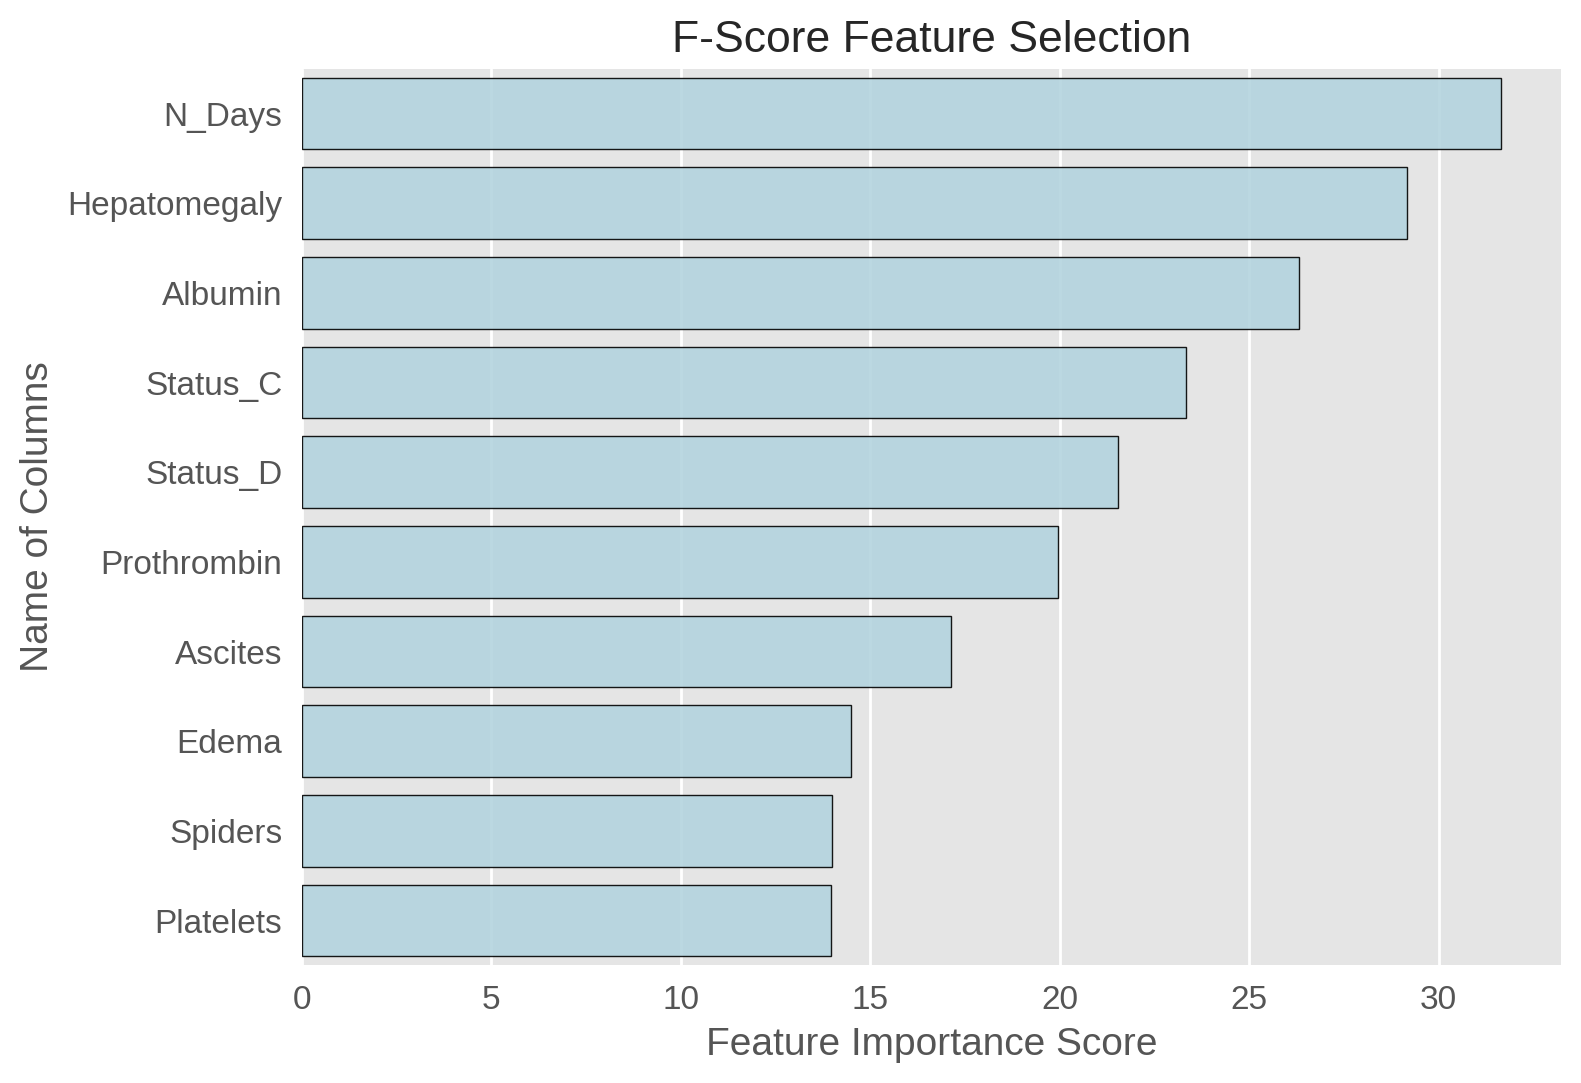

In [26]:
plt.style.use('ggplot')
sns.barplot(y=high_f_score_columns, x=top_features_fscore, color='lightblue',edgecolor='black', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('F-Score Feature Selection',fontsize=16)
plt.xlabel("Feature Importance Score",fontsize=14)
plt.ylabel('Name of Columns', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Feature Selection by using Random Forest Feature Selection Method

In this feature selection method we are using a random forest algorithm to do the feature selection. Random forest is a technique that is an ensemble method that is the combination of multiple decision trees. By the help of sklearn library, we perform this random forest feature selection. It will make the decision on the basis of measuring the decrease in prediction accuracy when a particular feature is randomly permuted while keeping the other features unchanged.




In [27]:
#n_estimators is 100 means we are using 100 decision trees 
Random_forest_model = RandomForestClassifier(n_estimators=100,random_state=999)
Random_forest_model.fit(mask_df1, target)
random_forest_feature_indices = np.argsort(Random_forest_model.feature_importances_)[::-1][0:10]
random_forest_feature_indices

array([ 0, 16, 10, 15,  2,  8, 12, 11, 14, 13])

In [28]:
rf_feature_importance = Random_forest_model.feature_importances_[random_forest_feature_indices]
rf_feature_importance

array([0.11480624, 0.10597961, 0.10138832, 0.0996973 , 0.08108019,
       0.08041397, 0.06242057, 0.0607778 , 0.06030792, 0.05986779])

In [29]:
rf_column_name = mask_df1.columns[random_forest_feature_indices].values
rf_column_name

array(['N_Days', 'Prothrombin', 'Albumin', 'Platelets', 'Age',
       'Bilirubin', 'Alk_Phos', 'Copper', 'Tryglicerides', 'SGOT'],
      dtype=object)

We are creating a bar graph for understanding the best random feature with repect to there feature name. For this we are using ggplot and sns library

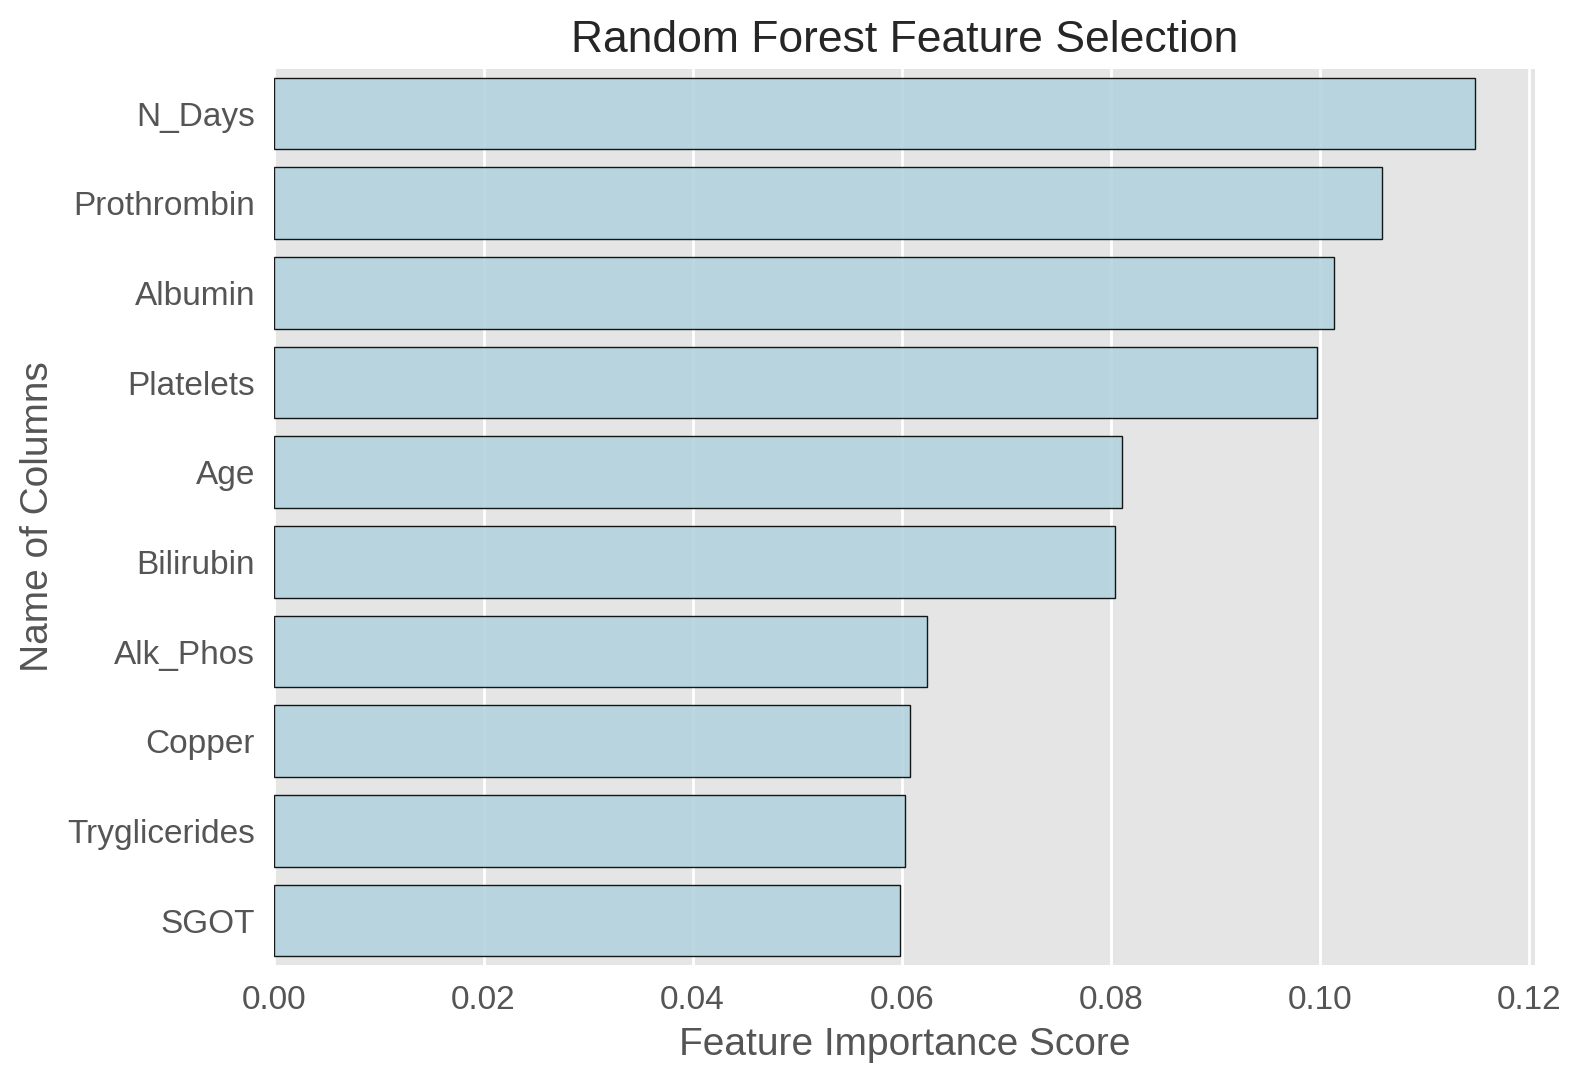

In [30]:
plt.style.use('ggplot')
sns.barplot(y=rf_column_name, x=rf_feature_importance, color='lightblue',edgecolor='black', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Random Forest Feature Selection',fontsize=16)
plt.xlabel("Feature Importance Score",fontsize=14)
plt.ylabel('Name of Columns', fontsize=14) 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout() 
plt.show()

## Model Fitting & Tuning

Here we are choosing the top 10 features that we get from `random forest feature selection`. Now we are filtering the data on the basis of high feature importance according to random forest feature selection.

In [31]:
mask_df1 = mask_df1[rf_column_name]
mask_df1.sample(5,random_state=999)

,N_Days,Prothrombin,Albumin,Platelets,Age,Bilirubin,Alk_Phos,Copper,Tryglicerides,SGOT
317,0.344762,0.055556,0.641791,0.370258,0.326923,0.014440,0.071463,0.118151,0.132743,0.205036
344,0.626841,0.122222,0.671642,0.494689,0.423077,0.007220,0.071463,0.118151,0.132743,0.205036
221,0.116954,0.377778,0.529851,0.270106,0.384615,0.151625,0.148894,0.381849,0.180531,0.327338
287,0.215818,0.066667,0.720149,0.358118,0.442308,0.303249,0.025638,0.176370,0.369912,0.210374
219,0.251157,0.177778,0.470149,0.251897,0.730769,0.126354,0.178806,0.157534,0.141593,0.428058


It is just `an example` before doing any hyperparameter or without using cross validation techniques. The accuracy score is low. So we need to improve the accuracy score, to improve the accuracy score, we will do cross validation and hyperparameter tuning for each model.

In [32]:
D_train, D_test, t_train, t_test = train_test_split(mask_df1.values, target, test_size = 0.3, random_state=999)

In [33]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, p=2)
knn_classifier.fit(D_train, t_train)
knn_classifier.score(D_test, t_test)

0.4444444444444444

### Cross validation method 
Our dataset is small; it has only 418 rows so we will use a cross validation method while doing hyperparameter tuning. Cross validation is a technique in which we divide the dataset into equal  `5-fold` or `10-fold`. Suppose we are using 5-fold cross validation so in which the data is equal 5-fold and first 4- fold is used to train the data and 5 chunks is used to test the model. In the next step 4th chunks are used to test the data and this process repeats for all chunks. There are many methods for cross validation techniques. We are using Kfold cross validation method with the help of sklearn library. And we are using repeat `Kfold method` in which cross validation method repeat many times 


In [34]:
# we are doing repeat cross validation technique with the help of RepeatedStratifiedKFold
cross_validation = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

In [35]:
D_train, D_test, t_train, t_test = train_test_split(mask_df1.values, target, test_size = 0.3, random_state=999)

We divide the dataset into `training set` and `test set`. The train data is 70% and the test data is 30%

In [36]:
D_train.shape,t_train.shape

((292, 10), (292,))

In [37]:
D_test.shape,t_test.shape

((126, 10), (126,))

### 1. KNN Hyperparameter Tuning and Visualization

In the KNN model there is a different parameter n_neighbours and p value. P value is how to calculate the distance between two neighbours. So we will use different combinations of n_neighbors and p value and see which combination is good for our accuracy. So for doing hyperparameter tuning we will use `GridSearchCV`. Here we will pass different parameters in GridSearchCV. `Estimator` is for which model we are using, `cv_method` is for which cross validation model we are using, `scoring` is used to specify the evaluation metric to be used for scoring. `Param_grid` is the dictionary of different n_neighbours and p values. `Verbose` is used to control the amount of output messages.

In [38]:
# evaluation metric used for scording  
scoring  = "roc_auc_ovr"

In [39]:
#create a dictionary to use different combination of n_neighbors and p value
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1,2,5]}

In [40]:
# using sklearn's GridSearchCV for doing hyperparameter tuning and cross validation 
KNN_Model_HT = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cross_validation,     
                      verbose=1,  
                      scoring=scoring, 
                      return_train_score=True)

In [41]:
KNN_Model_HT.fit(D_train,t_train);

Fitting 15 folds for each of 21 candidates, totalling 315 fits


In [42]:
#getting best parameter of KNN by using best_params_
KNN_Model_HT.best_params_

{'n_neighbors': 7, 'p': 5}

In [43]:
#getting the best score by using best_score_
KNN_Model_HT.best_score_ 

0.6670412232328286

In [44]:
#mean score of each cross validation score 
KNN_Model_HT.cv_results_['mean_test_score']

array([0.57013121, 0.56450351, 0.57665488, 0.61227971, 0.61204327,
       0.63163062, 0.63592723, 0.63337731, 0.64829987, 0.64544903,
       0.65772125, 0.66222374, 0.66043083, 0.66285693, 0.6624638 ,
       0.66674804, 0.66068239, 0.66396138, 0.66684821, 0.66146184,
       0.66704122])

In [45]:
KNN_Result = pd.DataFrame(KNN_Model_HT.cv_results_['params'])
KNN_Result['Test_Score'] = KNN_Model_HT.cv_results_['mean_test_score']
KNN_Result['Metric'] = KNN_Result['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
KNN_Result.head(3)

,n_neighbors,p,Test_Score,Metric
0,1,1,0.570131,Manhattan
1,1,2,0.564504,Euclidean
2,1,5,0.576655,Minkowski


By using sns library we visualize this graph. This graph is showing that p=5 and k = 7 is the best parameter for high accuracy 

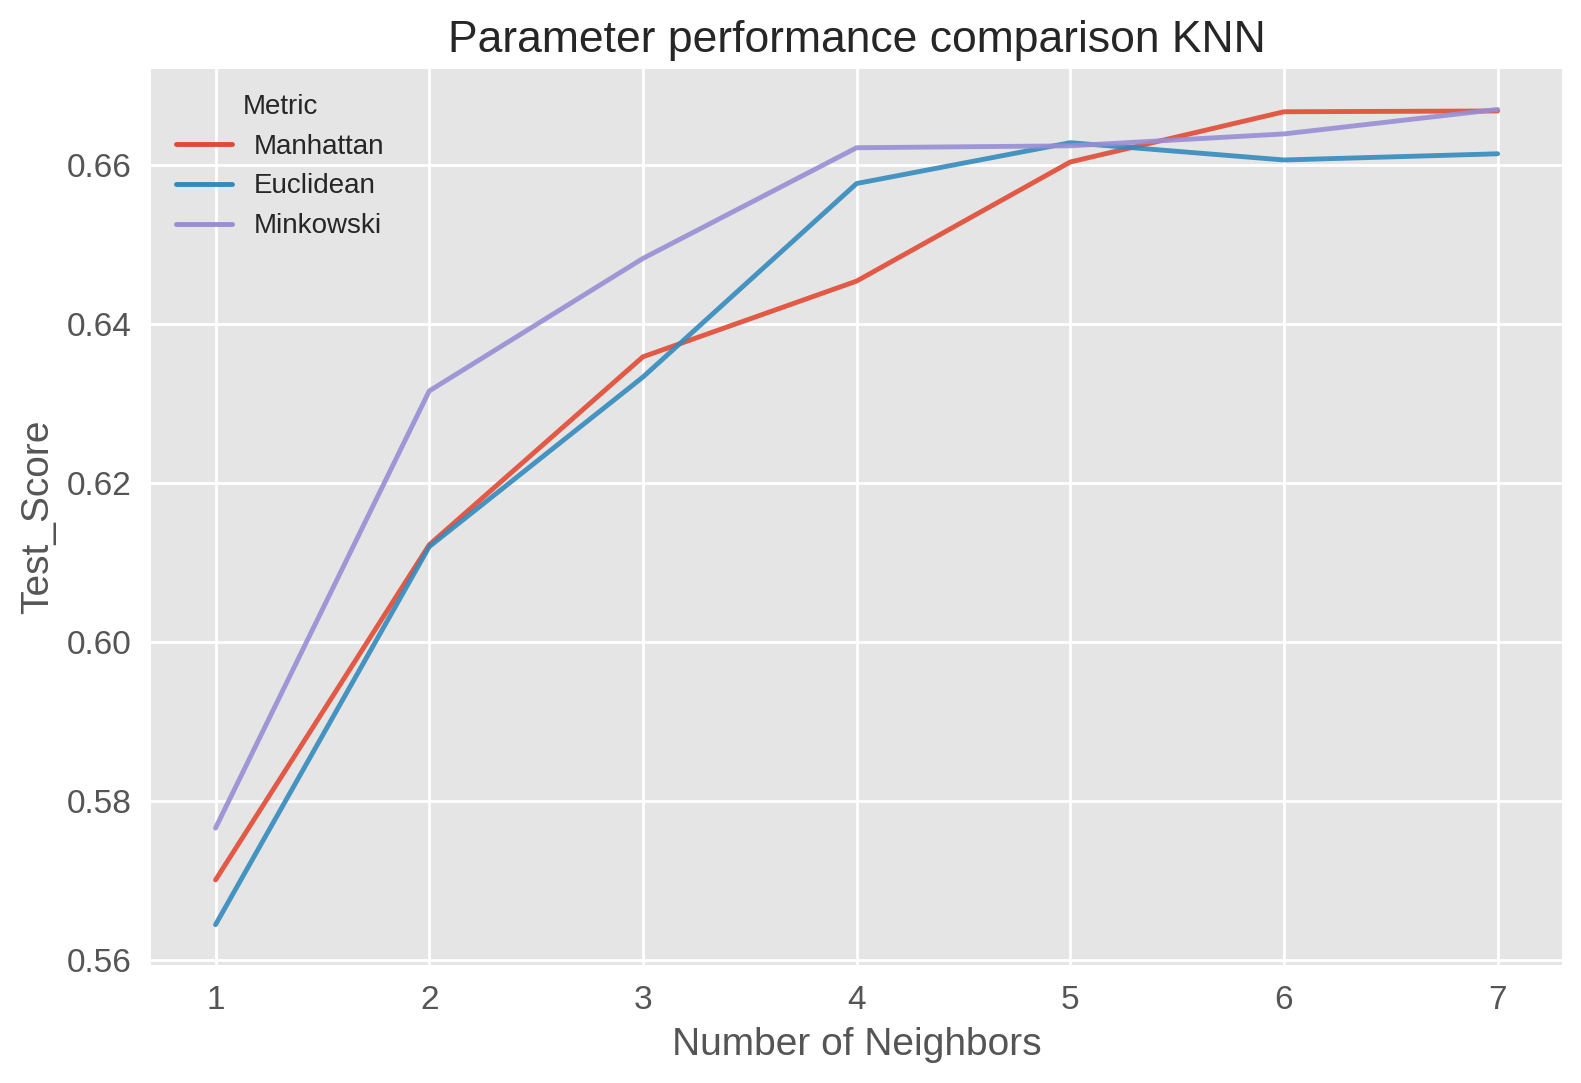

In [46]:
plt.style.use('ggplot')
sns.lineplot(y = KNN_Result['Test_Score'], x = KNN_Result["n_neighbors"], hue= KNN_Result["Metric"], \
            color='lightblue', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Parameter performance comparison KNN',fontsize=16)
plt.xlabel("Number of Neighbors",fontsize=14)
plt.ylabel('Test_Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()    

### 2. Decision Tree Hyperparameter Tuning and Visualization

Now we are doing hyperparameter  tuning for the decision tree. There are three parameter criterion, maximum depth of tree and minimum samples split. We will perform this by using GridSearchCV and also using cross validation technique.

In [47]:
#define decision tree classifier
decision_tree_clf = DecisionTreeClassifier(random_state=999)

In [48]:
##create a dictionary to use different combination of criterion and max_depth and min_samples_split
DT_Parameter = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]} 

In [49]:
#using sklearn's GridSearchCV for doing hyperparameter tuning and cross validation
DT_GridSearch = GridSearchCV(estimator=decision_tree_clf, 
                     param_grid=DT_Parameter, 
                     cv=cross_validation,
                     verbose=1, 
                     scoring=scoring)

In [50]:
#fit the Decision tree gridSearch model on the data and target value 
DT_GridSearch.fit(D_train, t_train);

Fitting 15 folds for each of 32 candidates, totalling 480 fits


In [51]:
#getting best parameter of Decision by using best_params_
DT_GridSearch.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [52]:
#best score
DT_GridSearch.best_score_

0.6396380924637248

In [53]:
# creating a dataframe of using criterion,max_depth, min_samples_split, Test_Score from DT_GridSearch
DT_Result = pd.DataFrame(DT_GridSearch.cv_results_['params'])
DT_Result['Test_Score'] = DT_GridSearch.cv_results_['mean_test_score']
DT_Result.head(3)

,criterion,max_depth,min_samples_split,Test_Score
0,gini,1,2,0.625554
1,gini,1,3,0.625554
2,gini,2,2,0.639638


By using sns library we visualize this graph. This graph is showing that `criterion = gini` and `max_depth = 2` is the best parameter for high accuracy in Decision Tree

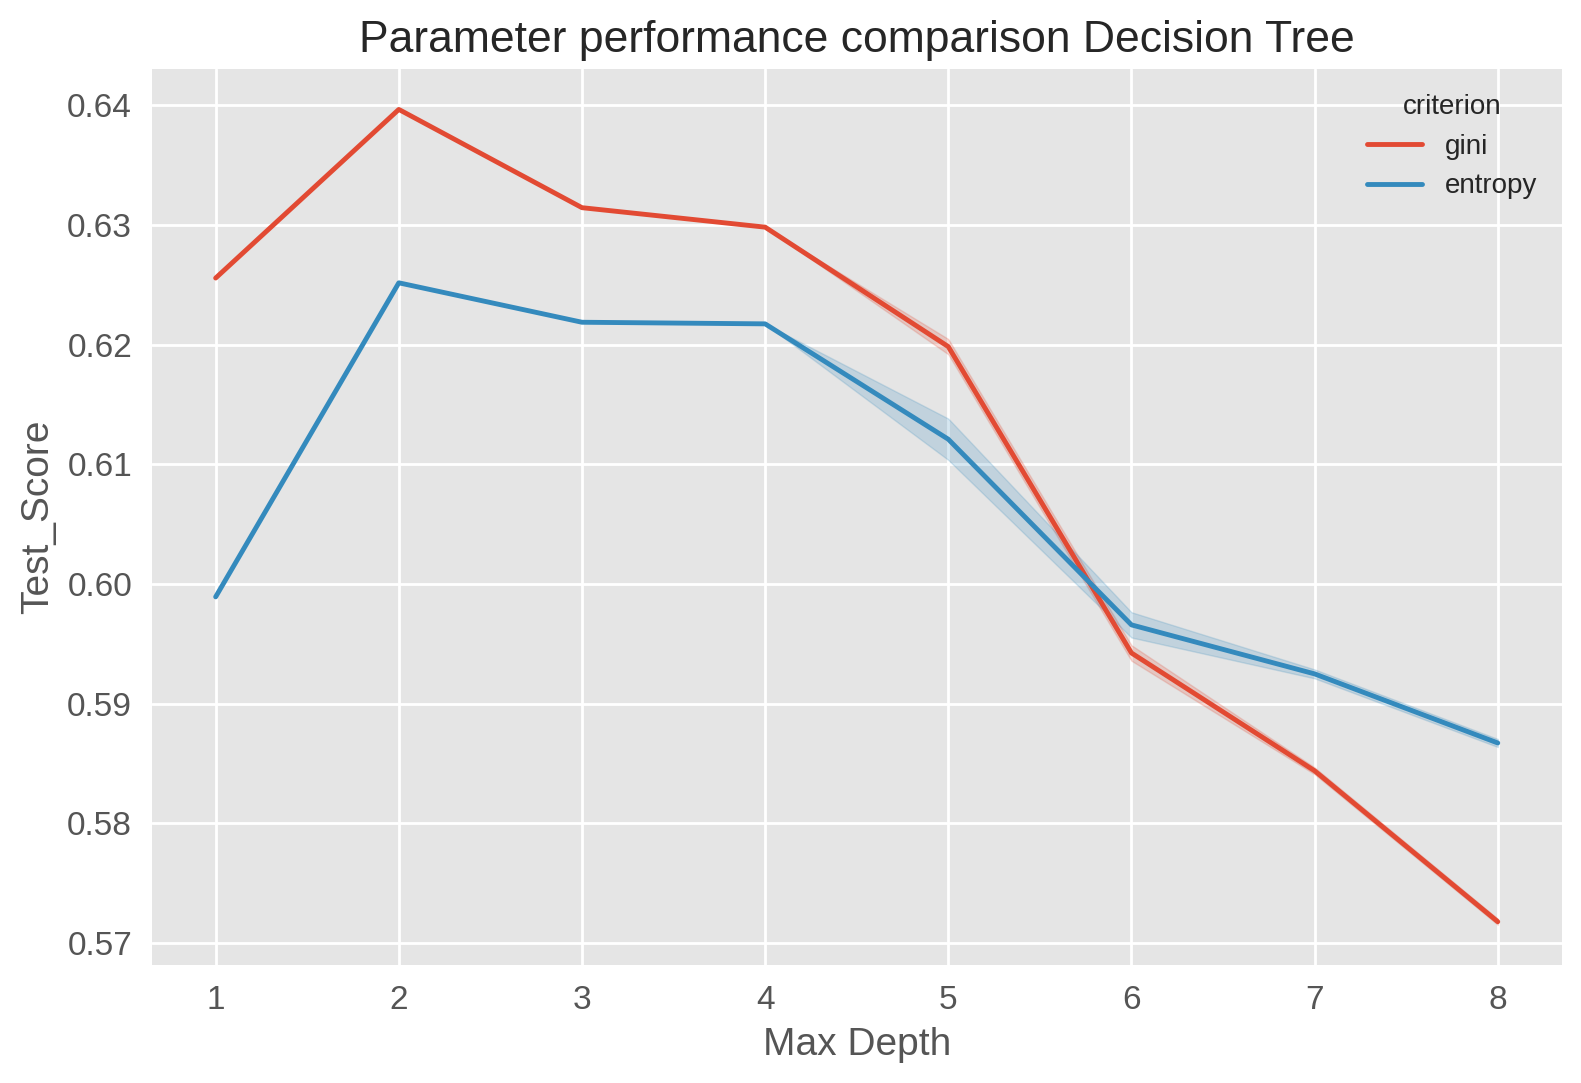

In [54]:
plt.style.use('ggplot')
sns.lineplot(y = DT_Result['Test_Score'], x = DT_Result["max_depth"], hue= DT_Result["criterion"])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Parameter performance comparison Decision Tree',fontsize=16)
plt.xlabel("Max Depth",fontsize=14)
plt.ylabel('Test_Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()    

### 3. Random Forest Hyperparameter Tuning and Visualization
Random forest is an ensemble decision tree technique. Random forest is a combination of multiple decision trees. Here we are doing hyperparameter tuning using GridSearchCV.

In [55]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],  # Maximum depth of the trees
    'min_samples_split': [2, 3],  # Minimum number of samples required to split a node
    'criterion': ['gini', 'entropy']  # Impurity measure for splitting
}

In [56]:
rf_model = RandomForestClassifier()

In [57]:
RF_GridSearch = GridSearchCV(estimator=rf_model, 
                     param_grid=param_grid_rf, 
                     cv=cross_validation,
                     verbose=1, 
                     scoring=scoring)

In [58]:
RF_GridSearch.fit(D_train, t_train);

Fitting 15 folds for each of 96 candidates, totalling 1440 fits


In [59]:
##getting best parameter of Random Forest by using best_params_
RF_GridSearch.best_params_  

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 200}

In [60]:
RF_GridSearch.best_score_

0.732984139843585

In [61]:
# creating a dataframe of using criterion,max_depth, min_samples_split, Test_Score from RF_GridSearch
RF_Result = pd.DataFrame(RF_GridSearch.cv_results_['params'])
RF_Result['Test_Score'] = RF_GridSearch.cv_results_['mean_test_score']
RF_Result.head(3)

,criterion,max_depth,min_samples_split,n_estimators,Test_Score
0,gini,1,2,100,0.710794
1,gini,1,2,200,0.710926
2,gini,1,2,300,0.711665


By using sns library we are visualize the line graph with different parameter of randomforest and this graph shows that the high accuracy of model is at criterion = `gini`, max_depth is `3`. 

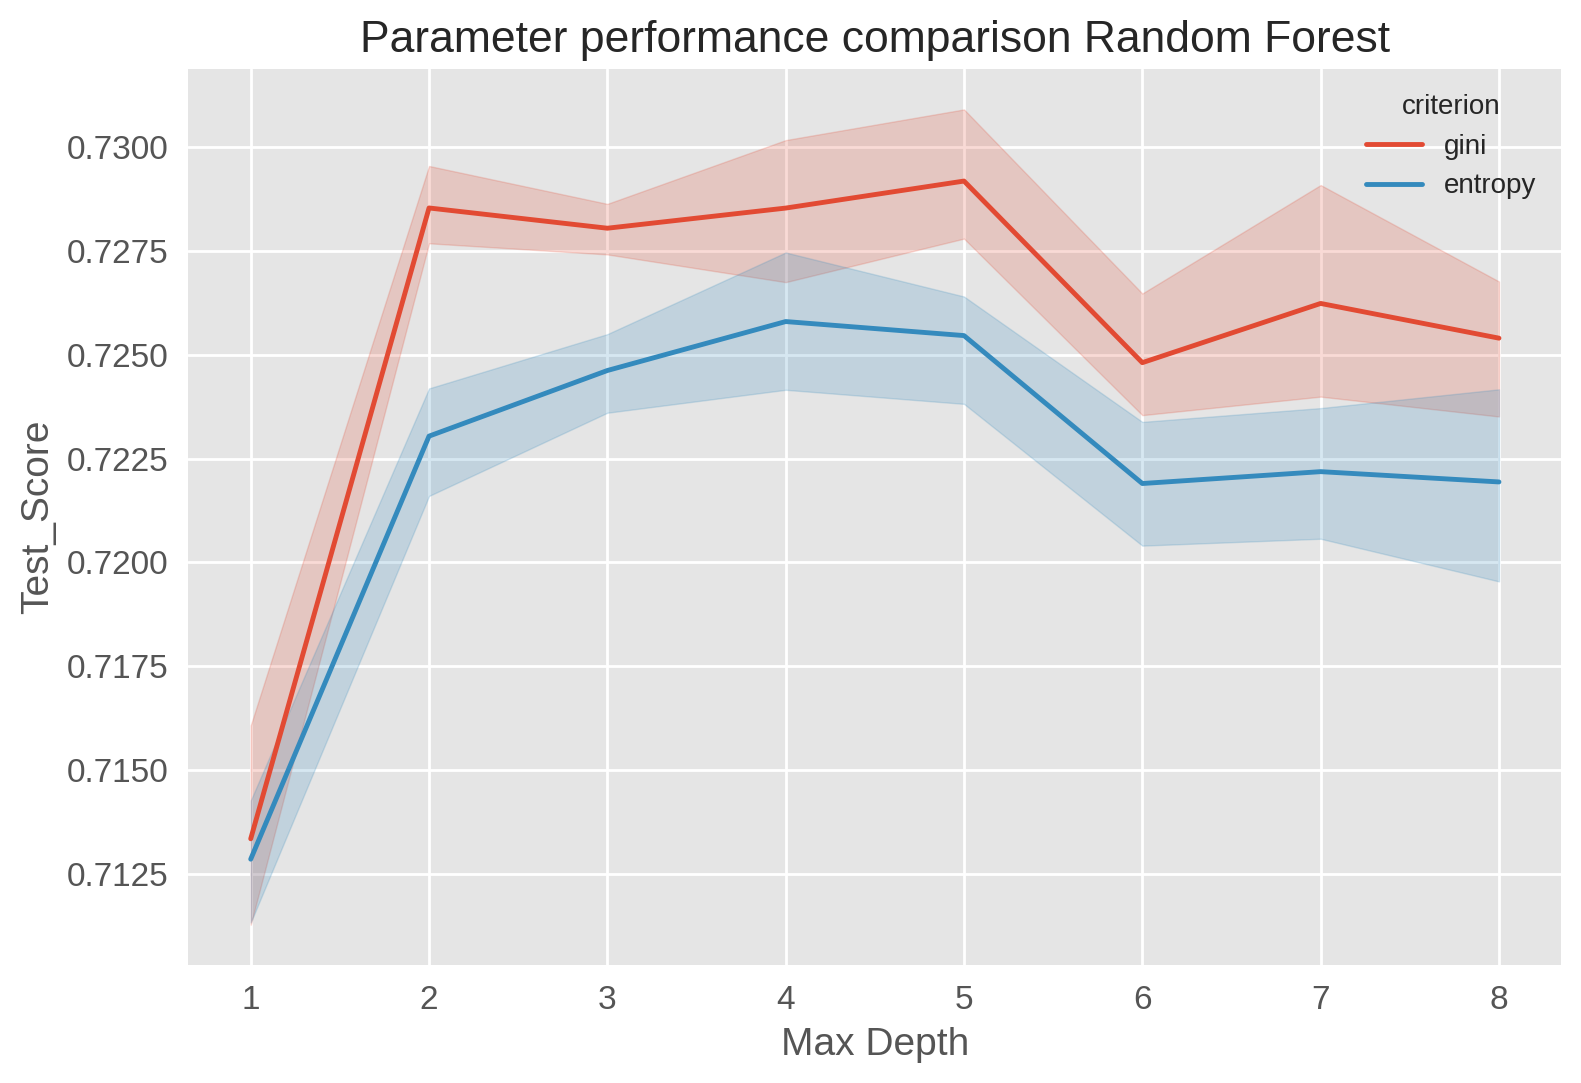

In [62]:
plt.style.use('ggplot')
sns.lineplot(y = RF_Result['Test_Score'], x = RF_Result["max_depth"], hue= RF_Result["criterion"])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Parameter performance comparison Random Forest',fontsize=16)
plt.xlabel("Max Depth",fontsize=14)
plt.ylabel('Test_Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()    

### 4. Naive Bayes Hyperparameter Tuning and Visualization

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
NB_model = MultinomialNB()

In [65]:
MNB_param_grid = {
    'alpha': [0.1, 0.2,0.3,0.4,0.5,0.7,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.7, 2.0]}  # Smoothing parameter 

In [66]:
MNB_GridSearch = GridSearchCV(estimator=NB_model, 
                     param_grid=MNB_param_grid, 
                     cv=cross_validation,
                     scoring=scoring,
                    verbose=1)

In [67]:
#feating the multinominal NB model on our dataset
MNB_GridSearch.fit(D_train, t_train);

Fitting 15 folds for each of 15 candidates, totalling 225 fits


In [68]:
#best accuracy of multinominal NB model
MNB_GridSearch.best_score_

0.6886997709412032

In [69]:
MNB_GridSearch.best_params_

{'alpha': 0.1}

In [70]:
# creating a dataframe of using fit_prior,alpha,Test_Score from _GridSearch
MNB_Result = pd.DataFrame(MNB_GridSearch.cv_results_['params'])
MNB_Result['Test_Score'] = MNB_GridSearch.cv_results_['mean_test_score']
MNB_Result.head()

,alpha,Test_Score
0,0.1,0.688700
1,0.2,0.688692
2,0.3,0.688627
3,0.4,0.688575
4,0.5,0.688496


The visualization is showing the relationship between test score and alpha parameter of Naive Bayes.

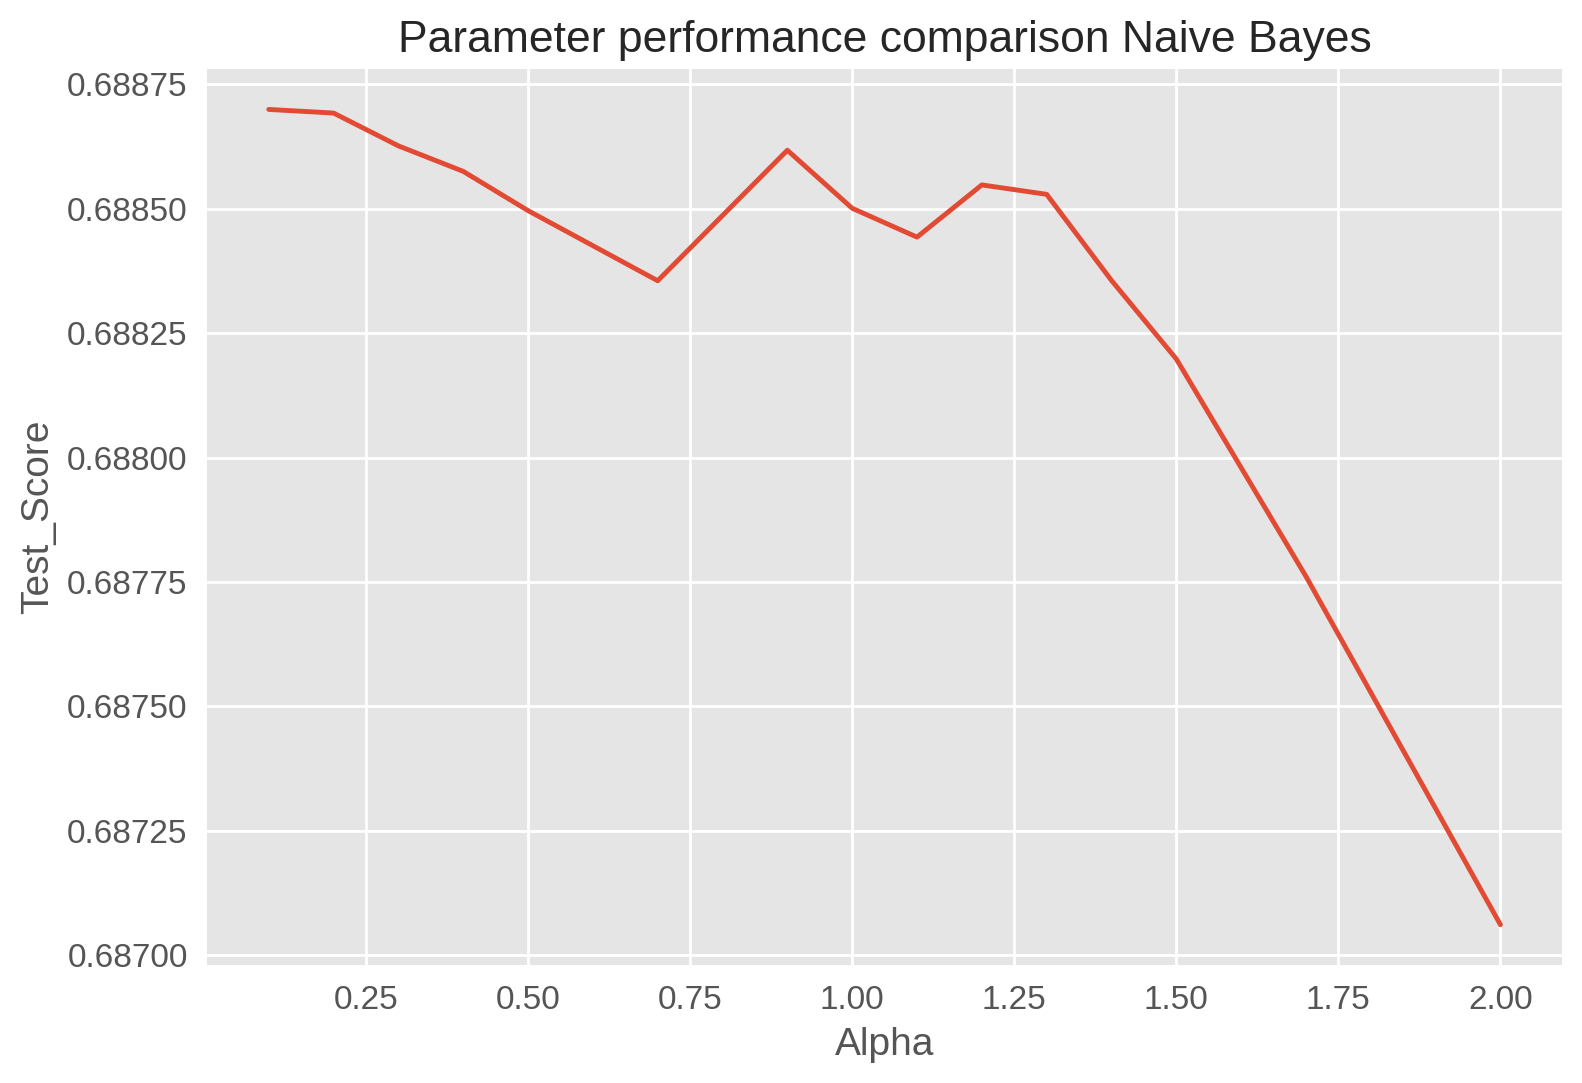

In [71]:
plt.style.use('ggplot')
sns.lineplot(y = MNB_Result['Test_Score'], x = MNB_Result["alpha"])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.title('Parameter performance comparison Naive Bayes',fontsize=16)
plt.xlabel("Alpha",fontsize=14)
plt.ylabel('Test_Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()    

### Neural Network Model Fitting & Tuning
Neural networks, also known as deep learning models, have shown great promise in solving complex machine learning problems. They have been successfully used in various domains, including image and speech recognition, where they have achieved state-of-the-art performance. For this project, we explored the application of neural networks in predicting the stage of cirrhosis liver disease.

One of the advantages of neural networks is their ability to handle large amounts of data. They can effectively learn complex patterns and relationships within the data when provided with substantial datasets. This is particularly useful in the context of cirrhosis liver disease prediction, as the dataset likely contains a wealth of information that can help identify patterns indicative of different disease stages.

Additionally, neural networks are well-suited for handling numerical features, which is often the case in medical datasets. They can effectively process and learn from numerical data, making them a suitable choice for analyzing medical variables such as laboratory test results, patient demographics, and clinical measurements.

However, it is important to note that neural networks also have certain drawbacks. One significant limitation is their black box nature, which means that their internal workings are not easily interpretable. The complex architecture and the multitude of parameters make it challenging to understand why the model makes specific predictions. This lack of interpretability can be a concern in the medical field, where explanations for predictions are often required to build trust and facilitate decision-making.

Another challenge in neural network modeling is the requirement for a substantial amount of data. Insufficient data may lead to overfitting, where the model learns the specific characteristics of the training data too well, resulting in poor generalization to new, unseen data. It is important to carefully evaluate the dataset's size and quality to ensure the neural network can effectively learn and generalize from it.

Furthermore, neural network model fitting and tuning can be a complex and time-consuming process. Neural networks have numerous hyperparameters that need to be carefully adjusted to achieve optimal performance. These hyperparameters include the number of layers, the number of neurons per layer, learning rate, activation functions, regularization techniques, and more. Fine-tuning these hyperparameters often requires iterative experimentation and validation to find the optimal configuration that maximizes the model's predictive performance.

To tackle the challenge of neural network model fitting and tuning, we explored various sources and articles that provided insights into best practices and techniques. We studied the literature to understand the different architectural choices and hyperparameter settings that have been successful in similar medical prediction tasks. This knowledge guided our experimentation process and helped us make informed decisions when designing and fine-tuning our neural network model for predicting the stage of cirrhosis liver disease.

In conclusion, neural networks offer great potential for predicting the stage of cirrhosis liver disease. Their ability to handle large amounts of data and process numerical features makes them well-suited for this task. However, the black box nature, data requirements, and the complexity of model fitting and tuning should be carefully considered. By leveraging the existing literature and best practices, we aimed to build a robust neural network model that can provide accurate predictions for this critical medical task.

#### Our Neural NetworK Model

In [72]:
layer1_units = 4
layer2_units = 4   

In [73]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD

In [74]:
from tensorflow.keras.optimizers.legacy import SGD

In [75]:
loss = 'binary_crossentropy' 
# during training, we would like to monitor accuracy
accuracy_metrics = ['accuracy'] 

In [76]:
epochs = 500
batch_size = 100

In [77]:
layer1_activation = 'relu'
layer2_activation = 'relu'
output_activation = 'sigmoid'

In [78]:
layer1_dropout_rate = 0.05
layer2_dropout_rate = 0.00

In [79]:
#from tensorflow.keras.optimizers import legacy
learning_rate=0.01
decay=1e-6
momentum=0.5
# SGD stands for stochastic gradient descent
optimizer = SGD(lr=learning_rate, decay=decay, momentum=momentum)

In [80]:
def model_fact(input_dim, layer1_units, layer2_units):
    model = Sequential()
    model.add(Dense(layer1_units, input_dim=input_dim, activation=layer1_activation))
    model.add(Dropout(layer1_dropout_rate))
    model.add(Dense(layer2_units, activation=layer1_activation))
    model.add(Dropout(layer2_dropout_rate))
    model.add(Dense(1, activation=output_activation))
    model.compile(loss=loss, optimizer=optimizer, metrics=accuracy_metrics)
    return model

In [81]:
def plot_history(history): 
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy_of_mdl')
    plt.xlabel('Epoch_of_model')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()

In [82]:
model_test = model_fact(mask_df1.shape[1], layer1_units, layer2_units)

# in the summary, notice the LARGE number of total parameters in the model
model_test.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 44        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [83]:
%%time
history_of_test = model_test.fit(D_train, 
                              t_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              verbose=0, # set to 1 for iteration details, 0 for no details
                              shuffle=True,
                              validation_data=(D_test, t_test))

CPU times: user 21.2 s, sys: 739 ms, total: 22 s
Wall time: 25 s


In [84]:
history_of_test.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
# compute prediction performance on test data
output_of_model = model_test.predict(D_test).astype(float)

# decide classification based on threshold of 0.5
t_pred = np.where(output_of_model < 0.5, 0, 1)

# set up the results data frame
test_result = pd.DataFrame()
test_result['target'] = t_test.flatten()
test_result['fit'] = t_pred
# residuals will be relevant for regression problems
# result_test['abs_residual'] = np.abs(result_test['target'] - result_test['fit'])
test_result.head()


4/4 [==============================] - 0s 3ms/step


,target,fit
0,2.0,1
1,2.0,1
2,3.0,1
3,2.0,1
4,2.0,1


### Model Comparison 
In this model comparison firstly we are creating the classification report for every model that we implement in the hyperparameter tuning and check the accuracy and after that we are doing some t- tests between models and checking if there is any significant difference between models or not.    

We are checking accuracy scores by using cross validation and taking the best parameter from `GridSearchCV` for every model. 

In [86]:
from sklearn.model_selection import cross_val_score

cross_validation = StratifiedKFold(n_splits=10, shuffle=True, random_state=111)

result_of_cv = cross_val_score(estimator=KNN_Model_HT.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cross_validation, 
                                 n_jobs=-2,
                                 scoring='roc_auc_ovr')
result_of_cv.mean()

0.656020171957672

In [87]:
result_of_cv_DT = cross_val_score(estimator=DT_GridSearch.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cross_validation, 
                                 n_jobs=-1,
                                 scoring='roc_auc_ovr')
result_of_cv_DT.mean()

0.6392978395061728

In [88]:
result_of_cv_RF = cross_val_score(estimator=RF_GridSearch.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cross_validation, 
                                 n_jobs=-1,
                                 scoring='roc_auc_ovr')
result_of_cv_RF.mean()

0.6568540564373898

In [89]:
result_of_cv_MNB = cross_val_score(estimator=MNB_GridSearch.best_estimator_,
                                 X=D_test,
                                 y=t_test, 
                                 cv=cross_validation, 
                                 n_jobs=-1,
                                 scoring='roc_auc_ovr')
result_of_cv_MNB.mean()

0.6909457671957673

Here we can see that the accuracy of the Random forest model and other models is almost the same so we need to  check the significant difference by using t-test. A p-value smaller than 0.05 indicates a statistically significant difference. if p-value is not greater than 0.5 so there is no significant  difference between the accuracy of two models 


Here we are performing the t-test between random forest and NB to check the significant difference so we can say that the p value is greater than 0.05 so there is no significant difference between these models.


In [90]:
from scipy import stats
print(stats.ttest_rel(result_of_cv_MNB,result_of_cv_RF))

TtestResult(statistic=1.4207538196151854, pvalue=0.18909393393214494, df=9)


In [91]:
print(stats.ttest_rel(result_of_cv_DT,result_of_cv_RF))

TtestResult(statistic=-0.6768901099682344, pvalue=0.5154945886651596, df=9)


Here we are comparing the t-test between DT and KNN. The p value is not less than 0.05 so there is no significant difference between these two models.

In [92]:
print(stats.ttest_rel(result_of_cv_DT,result_of_cv))

TtestResult(statistic=-0.563610421749279, pvalue=0.5867856817353816, df=9)


In [93]:
print(stats.ttest_rel(result_of_cv_DT,result_of_cv_MNB))

TtestResult(statistic=-2.10252791465816, pvalue=0.06485167488669218, df=9)



`Classification Report` for all model that we implement while hyperparameter tuning

In [94]:
print("Classification Report of KNN Model")

KNN_pred = KNN_Model_HT.predict(D_test)
report_KNN = classification_report(t_test,KNN_pred) 
print(report_KNN)

print("Classification Report of Decision Tree Model")

DT_Pred = DT_GridSearch.predict(D_test)
classification_rep = classification_report(t_test, DT_Pred) 
print(classification_rep)

print("Classification Report of Random Forest Model")

RF_pred = RF_GridSearch.predict(D_test) 
class_report_RF = classification_report(t_test, RF_pred) 
print(class_report_RF)

print("Classification Report of  Naive Bayes Model")   

MNB_pred = MNB_GridSearch.predict(D_test)
class_report_MNB = classification_report(t_test, MNB_pred) 
print(class_report_MNB)

Classification Report of KNN Model
              precision    recall  f1-score   support

         2.0       0.35      0.26      0.30        35
         3.0       0.42      0.54      0.47        52
         4.0       0.44      0.38      0.41        39

    accuracy                           0.41       126
   macro avg       0.40      0.39      0.39       126
weighted avg       0.41      0.41      0.41       126

Classification Report of Decision Tree Model
              precision    recall  f1-score   support

         2.0       0.39      0.46      0.42        35
         3.0       0.39      0.38      0.39        52
         4.0       0.53      0.46      0.49        39

    accuracy                           0.43       126
   macro avg       0.44      0.43      0.43       126
weighted avg       0.43      0.43      0.43       126

Classification Report of Random Forest Model
              precision    recall  f1-score   support

         2.0       0.37      0.29      0.32        35
    

In [95]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbor") 
print(metrics.confusion_matrix(t_test,KNN_pred))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(t_test, DT_Pred))
print("\nConfusion matrix for Random FOrest") 
print(metrics.confusion_matrix(t_test, RF_pred))
print("\nConfusion matrix for Naive Bayes Model ") 
print(metrics.confusion_matrix(t_test, MNB_pred))


Confusion matrix for K-Nearest Neighbor
[[ 9 16 10]
 [15 28  9]
 [ 2 22 15]]

Confusion matrix for Decision Tree
[[16 13  6]
 [22 20 10]
 [ 3 18 18]]

Confusion matrix for Random FOrest
[[10 16  9]
 [16 27  9]
 [ 1 17 21]]

Confusion matrix for Naive Bayes Model 
[[ 0 31  4]
 [ 0 46  6]
 [ 0 22 17]]


# Critique & Limitations 

`Strengths` 

The project has a well- planned structure and process. Firstly, we deal with all the missing values and data preprocessing. After that we did one-vector encoding. The machine learning project includes other processes like feature selection, model fitting, hyperparameter tuning and model comparison. Furthermore, for different features, we visualise different graphs that help to gain some meaningful insights and patterns. This structure of the project helps us to achieve the goal of predicting the stage of cirrhosis liver disease.

To train a good model we did the feature selection and chose only top 10 features according to their importance. The project includes different models like KNN, decision tree, random forest, and naive bayes. We fit the training data on different models to get the best accuracy by comparing the accuracy score of different models. We also check the combination of hyperparameters for tuning by using the sklearn library that helps to choose the best parameter for prediction. For comparing the accuracy of models we did a t-test that tells us the significant difference between model accuracy or tells us which model is good. 

At the end we did a full detailed neural network model with hyperparameter tuning that will also help to understand the model and to predict the good accuracy. This model is a detailed overview about neural networks and how neural networks work. 

`Weakness`

Dataset limitation: The size of the dataset is small that we used in this project. The data is collected from the Mayo Clinic trial conducted between 1974 and 1984. As treatment and diagnostic methods have changed over time so the age of the data might limit its  relevance to current medical practices. This project contains five machine learning models but we also have some advance algorithms and techniques that could also be explored for predicting the stage of cirrhosis liver disease so that might provide more insight and improve the accuracy and performance of the model. 
    
Interpretability of Results: The project includes the classification report but we can do further analysis of the result and understand why the performance of the algorithms are low. 
    
Understanding the reasons behind the performance of each model will help to understand which feature or feature contributing to misclassifications.

Our data is very limited and it also has some imbalance feature that is the main reason behind less accuracy score while predicting the target variable.




# Summary & Conclusions

### Project Summary

This report presents the findings and conclusions of the Phase 2 analysis of the cirrhosis liver
disease prediction project. The project&#39;s main objective is to develop predictive models for
determining the stage of cirrhosis liver disease using various algorithms, including KNN,
decision tree, random forest, and naive Bayes. The dataset used in this project was obtained
from a Mayo Clinic trial conducted between 1974 and 1984 and includes valuable
information about primary biliary cirrhosis (PBC). Phase 1 of the project involved data
cleaning, visualization, and a literature review to gain insights into the disease. In Phase 2,
further analysis was conducted, including preprocessing, feature selection, model fitting,
hyperparameter tuning, and model comparison.

### Summary of Findings

**Data Preprocessing**

During data preprocessing, various cleaning techniques were applied to ensure the dataset's quality. Missing values were handled by replacing them with mean or median values, and data formats were adjusted, such as converting the age column from days to years. Additionally, imbalanced categories in the "Edema" column were addressed by combining two categories. Furthermore, the target column, representing the stage of cirrhosis liver disease, had a serious imbalance, which was mitigated by combining Stage 1 with Stage 2, resulting in three stages: 2, 3, and 4.

**Feature Selection**

Feature selection is crucial for improving model performance and reducing complexity. Two feature selection methods were employed: F-Score and Random Forest Feature Selection. The F-Score technique calculated the F-score for each feature with respect to the target column and selected the top 10 features with high F-scores. Random Forest Feature Selection utilized the random forest algorithm to determine feature importance, considering the decrease in prediction accuracy when a particular feature was randomly permuted. The top features were selected based on their importance scores.

**Model Fitting & Tuning**

Several machine learning algorithms were fitted to the dataset to develop predictive models. The selected models for this project were KNN, decision tree, random forest, and naive Bayes. The dataset was split into training and test sets, and cross-validation techniques were applied for model evaluation. Hyperparameter tuning was performed using GridSearchCV to identify the best combination of hyperparameters for each model, maximizing their performance. The aim was to find the optimal parameter values that yielded the highest accuracy for predicting the stage of cirrhosis liver disease.

**Neural Network Model Fitting & Tuning**

In addition to the selected models, a detailed exploration of Neural Network Model Fitting & Tuning was conducted. This involved studying various sources and articles to understand the intricacies of neural networks and their potential for predicting the stage of cirrhosis liver disease. The project provided a comprehensive overview of neural networks and their application to the dataset.

**Model Comparison**

To compare the performance of the different models, classification reports were generated, providing insights into accuracy, precision, recall, and F1-score for each model. Furthermore, to determine if there were any significant differences in accuracy between models, a t-test was conducted. The results of the t-test indicated that there was no significant difference in accuracy between the random forest and naive Bayes models.

### Conclusions

The project's well-organized methodology and structure, which includes data preprocessing, feature selection, model fitting, hyperparameter tuning, and model comparison, are its strongest points.

The stage of cirrhosis liver disease might be predicted with a respectable degree of accuracy using the chosen features and various models. Random forest and naive Bayes were the models that performed the best.
The project's shortcomings include the dataset's modest size and possible lack of relevance to contemporary medical procedures. Investigating more sophisticated methods and algorithms might improve the model's performance and accuracy.

In order to comprehend why the algorithms' performance is relatively poor and to pinpoint the causes of misclassifications, more analysis of the results is required.

In conclusion, this project successfully achieved the goal of predictive modeling for cirrhosis liver disease. The structured approach encompassed data preprocessing, feature selection, model fitting, hyperparameter tuning, and model comparison. The selected features and implemented models demonstrated reasonable accuracy in predicting the stage of cirrhosis liver disease. Among the models, random forest and naive Bayes performed particularly well. However, several limitations should be acknowledged. The dataset used in this project was relatively small and collected between 1974 and 1984,

# References

Cirrhosis Prediction Dataset. (n.d.). Www.kaggle.com. https://www.kaggle.com/datasets/fedesoriano/cirrhosis-prediction-dataset